## Setup

In [7]:
import cassiopeia as cas
import pandas as pd
import pickle as pic
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import json
import pprint
import caching

# Base parameters, no fitness
in_folder = "/data/yosef2/users/richardz/projects/CassiopeiaV2-Reproducibility/trees/exponential_plus_c/400cells/no_fit/char40/"
out_folder = "./benchmarking/"

In [2]:
# Load config
with open("config.json") as f:
    config = json.load(f)

# IO Setup
out_folder = "./post_sim_analytics/"
in_tree_raw = config["dir_structure"]

# Options:
pprint.pprint(config)

{'dir_structure': '/home/eecs/ivalexander13/datadir/simulation_data/trees/mutrate{mutation_proportions}/char{numcassettes}/states{numstates}/exponential_plus_c/cells2000/no_fit/',
 'fitness_regimes': ['no_fit'],
 'folders': ['exponential_plus_c'],
 'mutation_proportions': [0.05, 0.01, 0.001, 0.0001],
 'numcassettes': [10, 20, 40, 100],
 'numcells': [2000],
 'numstates': [1, 10, 50, 100]}


In [3]:
# Helper getter
def get_pair(in_tree_raw, numtree, **kwargs):
    filename = in_tree_raw.format(**kwargs)

    dists = pic.load(open(filename + f'dists{numtree}.pkl', 'rb'))
    dissim = pic.load(open(filename + f'dissim_whd{numtree}.pkl', 'rb'))
    return dists, dissim

get_pair(
    in_tree_raw, 
    numtree=40,
    mutation_proportions=0.1, 
    numcassettes=20,
    numstates=1)

(array([1.73197269, 1.22862942, 1.73197269, ..., 0.89577459, 1.22862942,
        1.73197269]),
 array([0.1, 0.1, 0.1, ..., 0. , 0.1, 0.1]))

In [26]:
def plot_pair(numtree, **kwargs):
    # Get Pair of Arrays
    dists, dissim = get_pair(
        in_tree_raw, 
        numtree=numtree,
        **kwargs)
    # dists, dissim

    # Calculate Correlation
    print('Corr: ' + str(np.corrcoef(dissim, dists)[0, 1]))

    # Calc MSE
    mse = (np.square(dists - dissim)).mean(axis=None)
    print(f'MSE: {mse}')

    # Histogram of Dissimilarity Map Distances
#     plt.hist(dissim[dissim >-1], bins=100);
#     plt.title('Histogram of Dissimilarity Map Distances')
#     plt.show()
#     plt.clf()

    # Scatter Plot
    plt.scatter(x=dists, y=dissim, alpha=0.01);
    plt.title('True Distance vs Exp Weighted Hamming Similarity')
    plt.xlabel('True Distance')
    plt.ylabel('Exp Weighted Hamming Similarity')
    linx = np.linspace(0, max(*dists, *dissim))
    plt.plot(linx, linx, 'red', alpha=0.3)
    plt.show()
    plt.clf()


Mutation Rate: 0.1
Corr: 0.41492042161058434
MSE: 2.1748513368346565


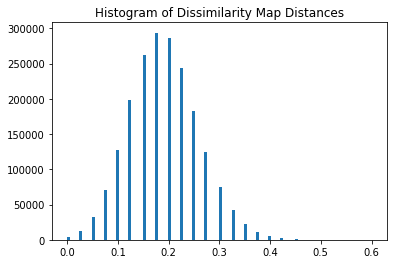

Mutation Rate: 0.5
Corr: 0.7534329271969032
MSE: 0.6302907533601716


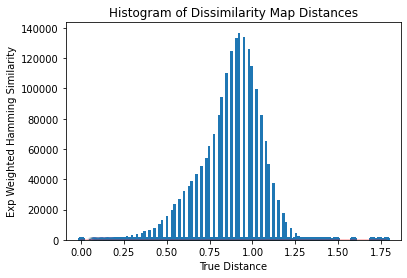

Mutation Rate: 1
Corr: nan
MSE: 2.773060916580379


/home/eecs/ivalexander13/datadir/miniconda3/envs/cass/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/home/eecs/ivalexander13/datadir/miniconda3/envs/cass/lib/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



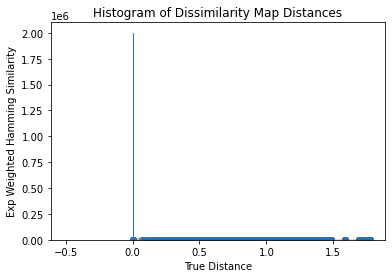

Mutation Rate: 2


/home/eecs/ivalexander13/datadir/miniconda3/envs/cass/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/home/eecs/ivalexander13/datadir/miniconda3/envs/cass/lib/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



Corr: nan
MSE: 2.773060916580379


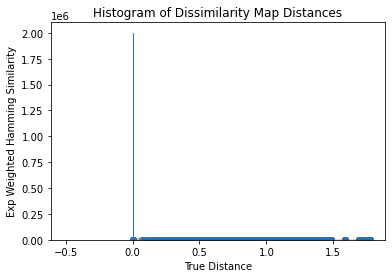

Mutation Rate: 5


/home/eecs/ivalexander13/datadir/miniconda3/envs/cass/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/home/eecs/ivalexander13/datadir/miniconda3/envs/cass/lib/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide



Corr: nan
MSE: 2.773060916580379


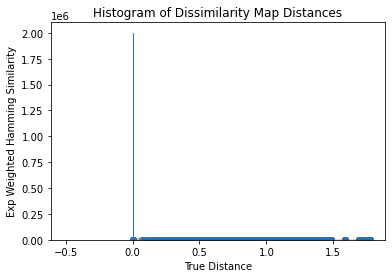

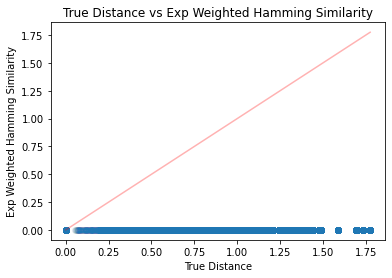

In [22]:
for i in [0.1, 0.5, 1, 2, 5]:
    print(f'Mutation Rate: {i}')
    plot_pair(
        numtree=30,
        mutation_proportions=i, 
        numcassettes=40,
        numstates=100)

## Comparing NumCassettes


Num Cassettes: 10
Corr: 0.38508195264251677
MSE: 0.7583356292480246


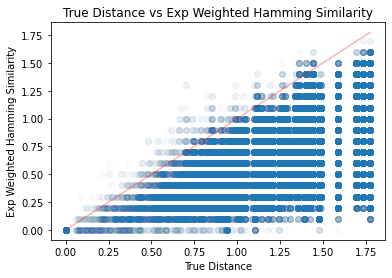

Num Cassettes: 20
Corr: 0.7221515939134997
MSE: 0.5223268723105392


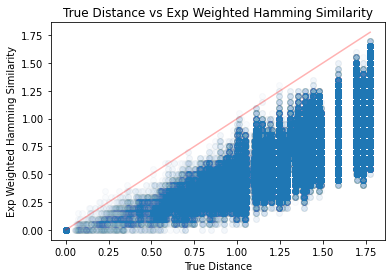

Num Cassettes: 40
Corr: 0.7534329271969032
MSE: 0.6302907533601716


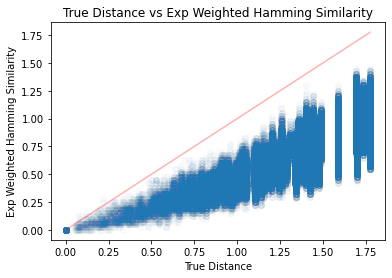

Num Cassettes: 100
Corr: 0.8918993877196676
MSE: 0.674629685803281


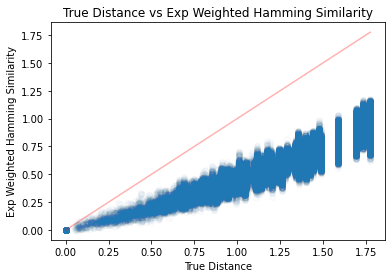

<Figure size 432x288 with 0 Axes>

In [30]:
for i in config['numcassettes']:
    print(f'Num Cassettes: {i}')
    plot_pair(
        numtree=30,
        mutation_proportions=0.5, 
        numcassettes=i,
        numstates=100)

## Across NumStates

Numstates: 1
Corr: 0.6610380039207752
MSE: 1.4234984420602272


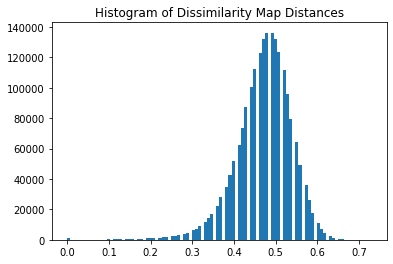

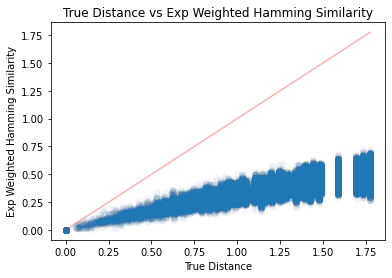

Numstates: 10
Corr: 0.8579069995609464
MSE: 0.7132928713465019


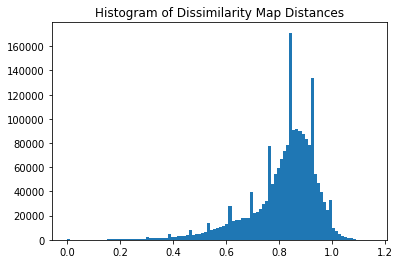

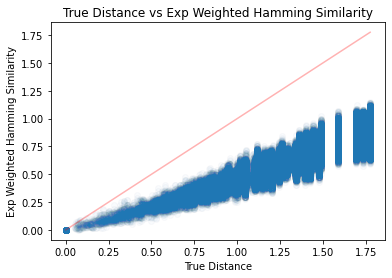

Numstates: 50
Corr: 0.9103110066991473
MSE: 0.6136996050626282


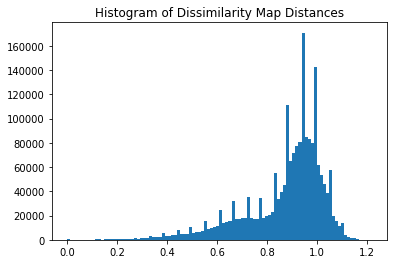

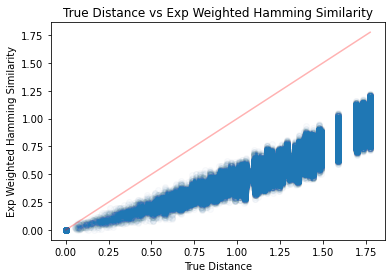

Numstates: 100
Corr: 0.8918993877196676
MSE: 0.674629685803281


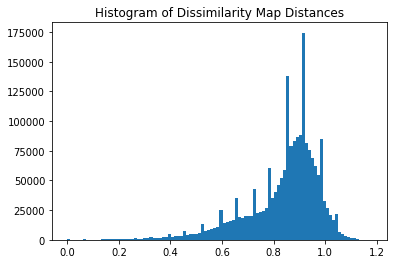

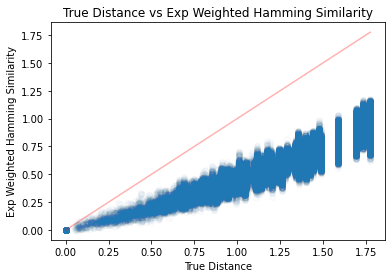

In [18]:
for i in config['numstates']:
    print(f'Numstates: {i}')
    plot_pair(
        numtree=30,
        mutation_proportions=0.5, 
        numcassettes=100,
        numstates=i)

In [5]:
#get the correlation
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(dissim.reshape(-1, 1), dist_melt)
plt.scatter(x=reg.predict(dissim_melt.reshape(-1, 1)), y=dists, alpha=0.01);
linx = np.linspace(0, max(*dists, *dissim))
plt.plot(linx, linx, 'red', alpha=0.3)
print(f"Linear Coef: {reg.coef_[0]}")

NameError: name 'dist_melt' is not defined

In [13]:
# Try plotting |dist - dissim|

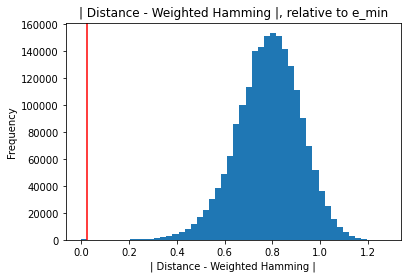

In [50]:
plt.hist(abs(dissim - dists), bins=50);

# find e_min
alldists = dists[dists != 0]
emin = min(alldists)

plt.axvline(x=emin / 2, c='red')
plt.title('| Distance - Weighted Hamming |, relative to e_min')
plt.ylabel('Frequency')
plt.xlabel('| Distance - Weighted Hamming |')
plt.show();